In [ ]:
#%pip install pillow
#%pip install open-clip-torch
%pip install matplotlib

In [10]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [ ]:
# create database file at folder my_vectordb 
chroma_client = chromadb.PersistentClient(path="my_vectordb")

multimodel_ef = OpenCLIPEmbeddingFunction()

image_loader = ImageLoader()
#create the collection or if it already exists then it will open the existing collection
multimodel_db = chroma_client.get_or_create_collection("multimodel_db",embedding_function=multimodel_ef, data_loader=image_loader)

In [4]:
multimodel_db.add(
    ids=['0','1'],
    uris = ['images/LN.jfif', 'images/TG.jfif']    
)


In [26]:
multimodel_db.count()

7

In [8]:
def print_query_results(query_list:list, query_results:dict) ->None:
    results_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'{query_list[i]}: {query_results["ids"][0][i]}')

        for j in range(results_count):
            id = query_results['ids'][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]

            print(f'id:{id}, distance:{distance}, metadata:{metadata}, document:{document}')

            print(f'data:{uri}')
            plt.imshow(data)
            plt.axis('off')
            plt.show()

lion: 0
id:0, distance:1.4634196075232184, metadata:None, document:None
data:images/LN.jfif


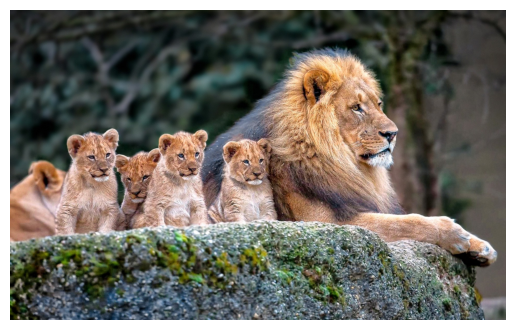

id:1, distance:1.5514264302469563, metadata:None, document:None
data:images/TG.jfif


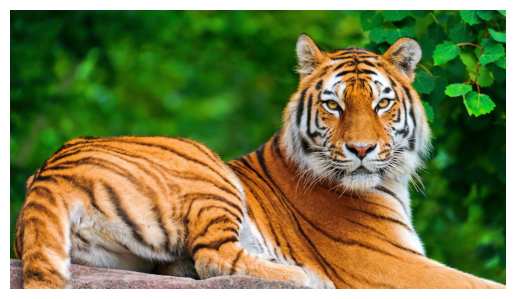

In [13]:
query_texts = ['lion']
query_results = multimodel_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents','distances','metadatas','data','uris']
)
#print(query_results)
print_query_results(query_texts,query_results)

In [15]:
# Adding the other images
multimodel_db.add(
    ids=['BC_1','FS_1','FS_2','VG_1','VG_2'],
    uris=[
        'images/BC_1.jpg',
        'images/FS_1.jfif',
        'images/FS_2.jfif',
        'images/VG_1.jfif',
        'images/VG_2.jfif'
    ],
    metadatas=[
        {'item_id':'BC_1', 'item_name':'Green Salad'},
        {'item_id':'FS_1', 'item_name':'Assorted Dish'},
        {'item_id':'FS_2', 'item_name':'Meat Pie'},
        {'item_id':'VG_1', 'item_name':'French Fries'},
        {'item_id':'VG_2', 'item_name':'Onion Rings'}
    ]
)

spinach: FS_2
id:FS_2, distance:1.5467216565223263, metadata:{'item_id': 'FS_2', 'item_name': 'Meat Pie'}, document:None
data:images/FS_2.jfif


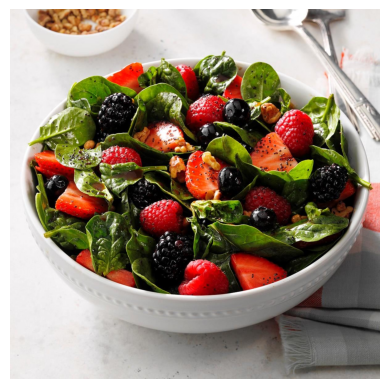

id:VG_2, distance:1.6371801913260597, metadata:{'item_id': 'VG_2', 'item_name': 'Onion Rings'}, document:None
data:images/VG_2.jfif


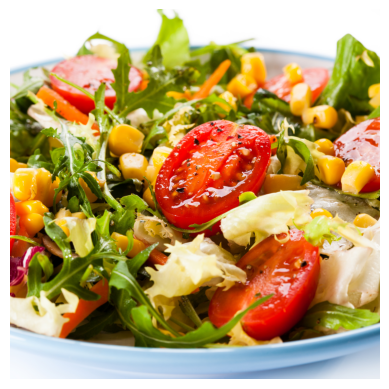

id:VG_1, distance:1.671585859010271, metadata:{'item_id': 'VG_1', 'item_name': 'French Fries'}, document:None
data:images/VG_1.jfif


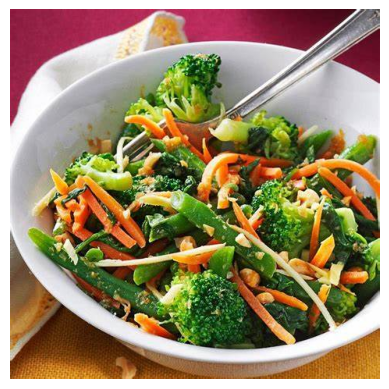

In [21]:
# Try the query text with corn, brocoli,rice, tomato and check the distances of the images retrieved
query_texts = ['spinach']
query_results = multimodel_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents','distances','metadatas','data','uris']
)
#print(query_results)
print_query_results(query_texts,query_results)

In [22]:
#update records with additional metadata
# updating
multimodel_db.update(
    ids=['BC_1','FS_1','FS_2','VG_1','VG_2'],
    uris=[
        'images/BC_1.jpg',
        'images/FS_1.jfif',
        'images/FS_2.jfif',
        'images/VG_1.jfif',
        'images/VG_2.jfif'
    ],
    metadatas=[
        {'item_id':'BC_1','image_category':'food', 'item_name':'Green Salad'},
        {'item_id':'FS_1','image_category':'food', 'item_name':'Assorted Dish'},
        {'item_id':'FS_2','image_category':'food', 'item_name':'Meat Pie'},
        {'item_id':'VG_1','image_category':'food', 'item_name':'French Fries'},
        {'item_id':'VG_2', 'image_category':'food', 'item_name':'Onion Rings'}
    ]
)

In [23]:
#same way update the animals
multimodel_db.update(
    ids=['0','1'],
    uris = ['images/LN.jfif', 'images/TG.jfif'],
    metadatas =[
        {'item_id':'0','image_category':'animal','item_name':'WILD1'},
        {'item_id':'1','image_category':'animal','item_name':'WILD2'}
    ]   
)

In [ ]:
#query with metadata category
query_texts = ['spinach']
query_results = multimodel_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents','distances','metadatas','data','uris'],
    where={'image_category': 'food'}
)
#print(query_results)
print_query_results(query_texts,query_results)

In [ ]:
#another way with not equal ($ne) to equal to ($eq)
#query with metadata category
query_texts = ['spinach']
query_results = multimodel_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents','distances','metadatas','data','uris'],
    where={'image_category': {'$ne':'food'}}
)
#print(query_results)
print_query_results(query_texts,query_results)

spinach: FS_2
id:FS_2, distance:1.5467216565223263, metadata:{'image_category': 'food', 'item_id': 'FS_2', 'item_name': 'Meat Pie'}, document:None
data:images/FS_2.jfif


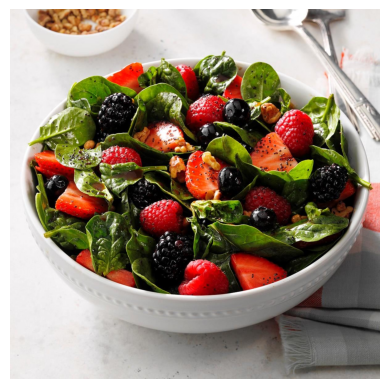

id:VG_2, distance:1.6371801913260597, metadata:{'image_category': 'food', 'item_id': 'VG_2', 'item_name': 'Onion Rings'}, document:None
data:images/VG_2.jfif


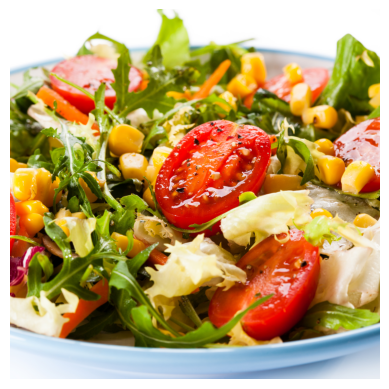

id:VG_1, distance:1.671585859010271, metadata:{'image_category': 'food', 'item_id': 'VG_1', 'item_name': 'French Fries'}, document:None
data:images/VG_1.jfif


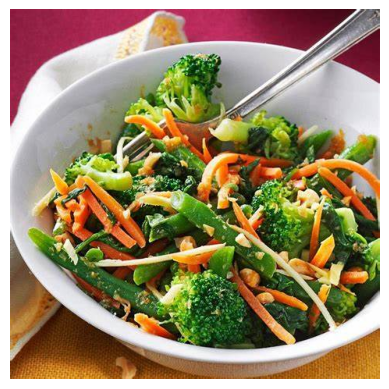

In [29]:
#another way with not equal ($ne) to equal to ($eq)
#query with metadata category
query_texts = ['spinach']
query_results = multimodel_db.query(
    query_texts=query_texts,
    n_results=3,
    include=['documents','distances','metadatas','data','uris'],
    where={'image_category': {'$eq':'food'}}
)
#print(query_results)
print_query_results(query_texts,query_results)